<a href="https://colab.research.google.com/github/Satyanarayana1432/Zepto_Data_analysis/blob/main/Zepto_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Define the path to the zip file
zip_path = '/content/Projects data analyst.zip'

# Define the directory where you want to extract the contents
extract_dir = '/content/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted data to {extract_dir}")

Extracted data to /content/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Starting Step 1: Data Setup & Pre-processing...")

# Load the datasets from the provided CSV files.
# The original files seem to be duplicates, so we'll load them and concatenate.
try:
    df_v1 = pd.read_excel('/content/zepto_v1.xlsx')
    df_v2 = pd.read_csv('/content/zepto_v2.csv', encoding='latin-1') # Added encoding here
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the files are in the correct directory.")
    exit()

# Combine the two datasets into a single DataFrame.
df = pd.concat([df_v1, df_v2], ignore_index=True)

# Remove any duplicate rows to ensure data integrity.
initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - len(df)} duplicate rows. Total rows now: {len(df)}")

# Standardize column names for easier access and consistency.
# This makes the names lowercase and removes spaces and special characters.
df.columns = [col.replace(' ', '').replace('&', '').lower() for col in df.columns]

# Correct data types. The 'outofstock' column should be a boolean.
# Corrected: Directly use boolean values as the column is already boolean
# df['outofstock'] = df['outofstock'].str.upper() == 'TRUE'


# The monetary values (mrp and discountedSellingPrice) appear to be in "paisa"
# (e.g., 2500 for Rs. 25.00). We'll convert them to standard rupees.
for col in ['mrp', 'discountedsellingprice']:
    df[col] = df[col] / 100

print("\nData Pre-processing complete. Here is a summary of the cleaned data:")
print(df.info())

Starting Step 1: Data Setup & Pre-processing...
Removed 3720 duplicate rows. Total rows now: 3744

Data Pre-processing complete. Here is a summary of the cleaned data:
<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 0 to 7158
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   category                3744 non-null   object 
 1   name                    3744 non-null   object 
 2   mrp                     3744 non-null   float64
 3   discountpercent         3744 non-null   int64  
 4   availablequantity       3744 non-null   int64  
 5   discountedsellingprice  3744 non-null   float64
 6   weightingms             3744 non-null   int64  
 7   outofstock              3744 non-null   bool   
 8   quantity                3744 non-null   int64  
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 266.9+ KB
None


In [ ]:
# -----------------------------------------------------------------------------
# STEP 2: EDA (Exploratory Data Analysis)
# -----------------------------------------------------------------------------
print("\nStarting Step 2: Exploratory Data Analysis (EDA)...")

# Get a quick statistical summary of the numerical data.
print("\nStatistical Summary of Numerical Columns:")
display(df.describe())

# Check the distribution of products across different categories.
print("\nProduct Count per Category:")
display(df['category'].value_counts())

# Create new calculated columns for more insightful analysis.
df['discountamount'] = df['mrp'] - df['discountedsellingprice']
df['discountpercent_calculated'] = (df['discountamount'] / df['mrp']) * 100

print("\nTop 5 products with the highest discount amount:")
top_5_discount_amount = df.sort_values(by='discountamount', ascending=False).head(5)
display(top_5_discount_amount[['name', 'category', 'discountamount', 'discountpercent']])


Starting Step 2: Exploratory Data Analysis (EDA)...

Statistical Summary of Numerical Columns:


,mrp,discountpercent,availablequantity,discountedsellingprice,weightingms,quantity
count,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,156.815438,7.604701,4.006410,141.945673,388.106036,212.918269
std,161.015792,9.206901,2.204351,138.635479,677.574052,194.865021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,2.000000,55.000000,100.000000,50.000000
50%,110.000000,6.000000,5.000000,103.500000,225.000000,180.000000
75%,200.000000,10.000000,6.000000,184.000000,450.000000,340.000000
max,2600.000000,51.000000,6.000000,1399.000000,10000.000000,1500.000000



Product Count per Category:


,count
category,
Cooking Essentials,515
Munchies,515
Packaged Food,390
Ice Cream & Desserts,390
Chocolates & Candies,390
Paan Corner,346
Personal Care,346
Home & Cleaning,194
Biscuits,147



Top 5 products with the highest discount amount:


,name,category,discountamount,discountpercent
1031,Borges Extra Light Olive Oil Bottle,Munchies,1201.0,46
517,Borges Extra Light Olive Oil Bottle,Cooking Essentials,1201.0,46
3016,Pampers Pants - Large,Personal Care,700.0,45
3360,Pampers Pants - Large,Paan Corner,700.0,45
2323,Kelloggs Chocos - Moons & Stars,Chocolates & Candies,264.0,40



Starting Step 3: Visualisation...


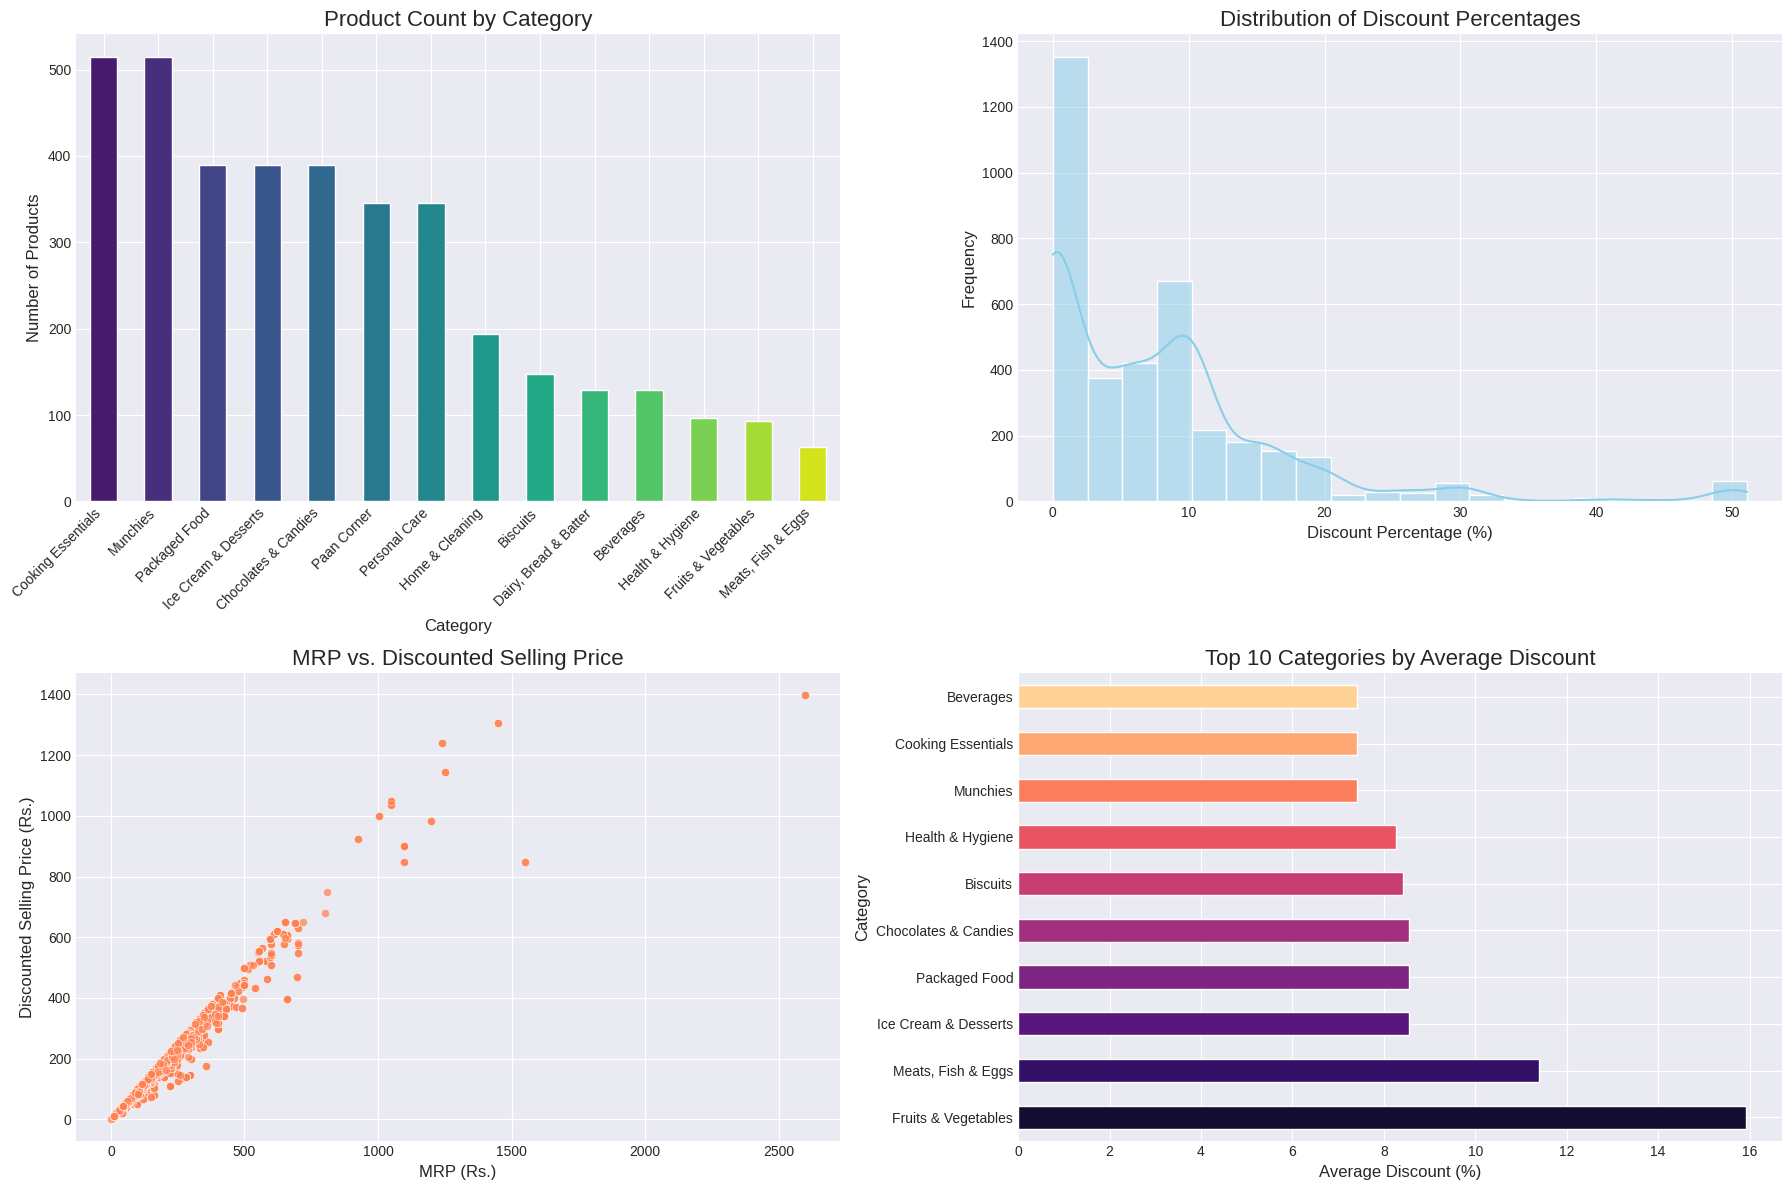

In [ ]:
# -----------------------------------------------------------------------------
# STEP 3: Visualisation
# -----------------------------------------------------------------------------
print("\nStarting Step 3: Visualisation...")

# Set up the plot style for better aesthetics.
sns.set_style("darkgrid")
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(18, 12))

# Plot 1: Bar chart showing product count by category.
plt.subplot(2, 2, 1)
df['category'].value_counts().plot(kind='bar', color=sns.color_palette("viridis", len(df['category'].unique())))
plt.title('Product Count by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plot 2: Histogram of the calculated discount percentages.
plt.subplot(2, 2, 2)
sns.histplot(df['discountpercent_calculated'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Discount Percentages', fontsize=16)
plt.xlabel('Discount Percentage (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Plot 3: Scatter plot to visualize the relationship between MRP and discounted price.
plt.subplot(2, 2, 3)
sns.scatterplot(x='mrp', y='discountedsellingprice', data=df, alpha=0.7, color='coral')
plt.title('MRP vs. Discounted Selling Price', fontsize=16)
plt.xlabel('MRP (Rs.)', fontsize=12)
plt.ylabel('Discounted Selling Price (Rs.)', fontsize=12)
plt.tight_layout()

# Plot 4: Bar chart of the top 10 most discounted categories.
plt.subplot(2, 2, 4)
avg_discount_by_category = df.groupby('category')['discountpercent_calculated'].mean().sort_values(ascending=False).head(10)
avg_discount_by_category.plot(kind='barh', color=sns.color_palette("magma", 10))
plt.title('Top 10 Categories by Average Discount', fontsize=16)
plt.xlabel('Average Discount (%)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()

plt.show()

In [ ]:
# -----------------------------------------------------------------------------
# STEP 4: Insights and Filtering
# -----------------------------------------------------------------------------
print("\nStarting Step 4: Insights and Filtering...")

# You can save the cleaned DataFrame to a new CSV file. This is your
# "production-ready" file that you can use for Power BI or other applications.
df.to_csv('zepto_cleaned_data.csv', index=False)
print("\nCleaned data saved to 'zepto_cleaned_data.csv'.")

# Filter the data to answer specific business questions.
# Question: Find all products in the 'Fruits & Vegetables' category that are on discount.
fruits_veg_on_sale = df[(df['category'] == 'Fruits & Vegetables') & (df['discountpercent'] > 0)]
print("\nProducts on sale in 'Fruits & Vegetables' category:")
display(fruits_veg_on_sale[['name', 'mrp', 'discountedsellingprice', 'discountpercent']])

# Question: Identify products that are out of stock and have a high MRP.
out_of_stock_high_mrp = df[(df['outofstock'] == True) & (df['mrp'] > 200)]
print("\nHigh MRP products that are out of stock:")
display(out_of_stock_high_mrp[['name', 'category', 'mrp']])


Starting Step 4: Insights and Filtering...

Cleaned data saved to 'zepto_cleaned_data.csv'.

Products on sale in 'Fruits & Vegetables' category:


,name,mrp,discountedsellingprice,discountpercent
0,Onion,25.0,21.0,16
1,Tomato Hybrid,42.0,35.0,16
2,Tender Coconut,51.0,43.0,15
3,Coriander Leaves,20.0,17.0,15
4,Ladies Finger,14.0,12.0,14
...,...,...,...,...
88,Beetroot,11.0,9.0,18
89,Moong Sprouts,35.0,29.0,17
90,Safal Frozen Mixed Vegetables,60.0,57.0,5
91,Safal Frozen Corn,41.0,39.0,4



High MRP products that are out of stock:


,name,category,mrp
545,Madhur Pure And Hygienic Sugar,Cooking Essentials,295.0
548,Fortune Soyabean Oil,Cooking Essentials,210.0
553,Aashirvaad Atta With Mutigrains,Cooking Essentials,315.0
573,Everest Kashmiri Lal Chilli Powder,Cooking Essentials,310.0
580,Patanjali Cow's Ghee,Cooking Essentials,565.0
595,India Gate Basmati Rice,Cooking Essentials,210.0
1059,Madhur Pure And Hygienic Sugar,Munchies,295.0
1062,Fortune Soyabean Oil,Munchies,210.0
1067,Aashirvaad Atta With Mutigrains,Munchies,315.0
1087,Everest Kashmiri Lal Chilli Powder,Munchies,310.0


In [ ]:
# Analyze products with the highest sales (assuming 'quantity' represents sales volume)
print("\nProducts with the highest sales volume:")
top_sales_products = df.sort_values(by='quantity', ascending=False).head(10)
display(top_sales_products[['name', 'category', 'quantity', 'mrp', 'discountedsellingprice']])


Products with the highest sales volume:


,name,category,quantity,mrp,discountedsellingprice
2817,Savlon Moisture Shield Germ Protection Handwas...,Personal Care,1500,189.0,189.0
3161,Savlon Moisture Shield Germ Protection Handwas...,Paan Corner,1500,189.0,189.0
1544,Pedigree Puppy Dry Dog Food Food Chicken & Milk,Packaged Food,1200,290.0,232.0
2320,Pedigree Puppy Dry Dog Food Food Chicken & Milk,Chocolates & Candies,1200,290.0,232.0
1932,Pedigree Puppy Dry Dog Food Food Chicken & Milk,Ice Cream & Desserts,1200,290.0,232.0
1804,Whiskas Kitten (2-12 months) Dry Cat Food Food...,Ice Cream & Desserts,1100,385.0,347.0
1416,Whiskas Kitten (2-12 months) Dry Cat Food Food...,Packaged Food,1100,385.0,347.0
2192,Whiskas Kitten (2-12 months) Dry Cat Food Food...,Chocolates & Candies,1100,385.0,347.0
3554,Shubh kart - Tejas Twisted Cotton Wicks 1000n,Home & Cleaning,1000,30.0,28.0
3561,Lizol Disinfectant Surface & Floor Cleaner Liq...,Home & Cleaning,975,205.0,188.0



Distribution of Available Quantity:


,count
availablequantity,
0,455
1,301
2,250
3,351
4,414
5,348
6,1625



Distribution of Quantity:


,count
quantity,
0,6
1,288
2,33
3,21
4,33
...,...
975,4
1000,1
1100,3


/tmp/ipython-input-2124208700.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='availablequantity', data=df, palette='viridis')


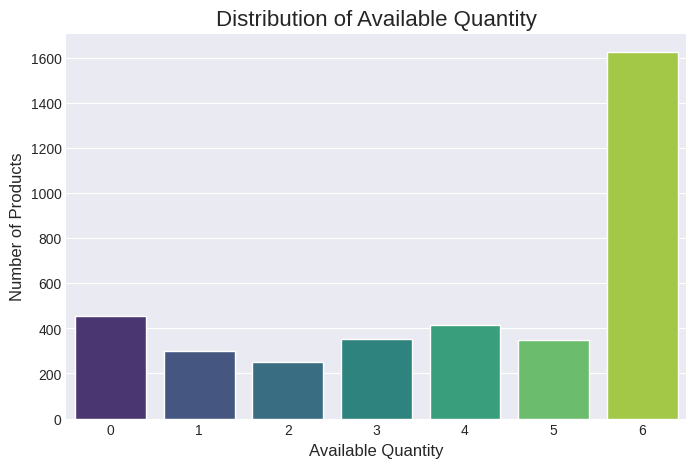

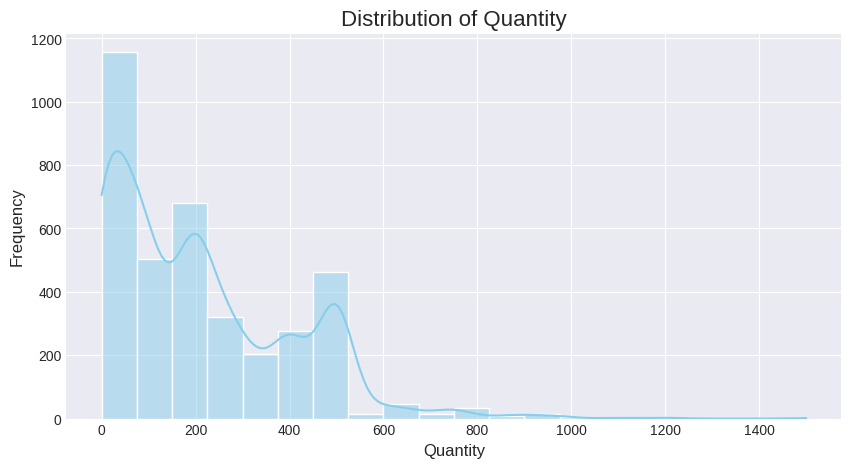

In [ ]:
# Explore the distribution of available quantity and quantity
print("\nDistribution of Available Quantity:")
display(df['availablequantity'].value_counts().sort_index())

print("\nDistribution of Quantity:")
display(df['quantity'].value_counts().sort_index())

# Visualize the distribution of available quantity
plt.figure(figsize=(8, 5))
sns.countplot(x='availablequantity', data=df, palette='viridis')
plt.title('Distribution of Available Quantity', fontsize=16)
plt.xlabel('Available Quantity', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.show()

# Visualize the distribution of quantity
plt.figure(figsize=(10, 5))
sns.histplot(df['quantity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()